# ANALYSIS WITH MACHINE LEARNING ALGORITHMS

In [112]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import numpy as np
import pandas as pd

start = time. time()
import pandas as pd
df=pd.read_csv("master.csv", engine='python')
df.head()


,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
median=df["HDI for year"].median()
print("median of column HDI for year",median)
df["HDI for year"].fillna(median,inplace=True)
df.head()

median of column HDI for year 0.779


,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.779,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.779,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.779,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.779,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.779,"2,156,624,900",796,Boomers


In [63]:
from sklearn.preprocessing import LabelEncoder
le_file=LabelEncoder()
input=df.drop('country-year',axis='columns')
input['n_age']= le_file.fit_transform(df['age'])
input['n_sex']= le_file.fit_transform(df['sex'])
input['n_year']= le_file.fit_transform(df['year'])
input['n_country']= le_file.fit_transform(df['ï»¿country'])
output=input['n_sex']
n_input=input.drop(['generation','population',' gdp_for_year ($) ','sex','ï»¿country','age','n_sex','suicides/100k pop','year'],axis='columns')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(n_input,output,test_size=0.3)
from sklearn.metrics import classification_report,confusion_matrix


In [64]:
x_train.head()

,suicides_no,HDI for year,gdp_per_capita ($),n_age,n_year,n_country
4069,1,0.779,4841,1,24,13
14335,0,0.779,17668,5,17,49
7786,20,0.779,1955,2,7,28
2207,22,0.779,617,0,8,7
24392,137,0.779,26978,5,4,89


In [65]:
y_train.head()

4069     0
14335    1
7786     0
2207     1
24392    1
Name: n_sex, dtype: int32

UNTIL NOW WE HAVE DROPED SOME PARAMETERS AND HAVE SPLIT OUT DATASET INTO TRAINING DATASET AND TESTING DATASET IN THE RATIO OF 70:30.

## K NEAREST NEIGHBOUR

the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). 

If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
clf=KNeighborsClassifier(n_neighbors=5) 
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",clf.score(x_test, y_test))


[[2506 1666]
 [2210 1964]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56      4172
           1       0.54      0.47      0.50      4174

   micro avg       0.54      0.54      0.54      8346
   macro avg       0.54      0.54      0.53      8346
weighted avg       0.54      0.54      0.53      8346

accuracy is 0.5355859094176851


## RANDOM FOREST

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. One big advantage of random forest is, that it can be used for both classification and regression problems.

Random Forest has nearly the same hyperparameters as a decision tree or a bagging classifier. Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Therefore, in Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node.

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
mid=time.time()
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test, y_test))


[[3144 1028]
 [1162 3012]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      4172
           1       0.75      0.72      0.73      4174

   micro avg       0.74      0.74      0.74      8346
   macro avg       0.74      0.74      0.74      8346
weighted avg       0.74      0.74      0.74      8346

ACCURACY IS 0.7375988497483824


## DECISION TREE

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or regression). Decision Tree algorithms are referred to as CART (Classification and Regression Trees).

In [68]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test,y_test))

[[3144 1028]
 [1162 3012]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      4172
           1       0.75      0.72      0.73      4174

   micro avg       0.74      0.74      0.74      8346
   macro avg       0.74      0.74      0.74      8346
weighted avg       0.74      0.74      0.74      8346

ACCURACY IS 0.7510184519530314


## LOGISTIC REGRESSION

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Logistic Regression is one of the most popular ways to fit models for categorical data, especially for binary response data in Data Modeling. It is the most important (and probably most used) member of a class of models called generalized linear models. Unlike linear regression, logistic regression can directly predict probabilities (values that are restricted to the (0,1) interval); furthermore, those probabilities are well-calibrated when compared to the probabilities predicted by some other classifiers, such as Naive Bayes. Logistic regression preserves the marginal probabilities of the training data. The coefficients of the model also provide some hint of the relative importance of each input variable.

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test,y_test))

[[3144 1028]
 [1162 3012]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      4172
           1       0.75      0.72      0.73      4174

   micro avg       0.74      0.74      0.74      8346
   macro avg       0.74      0.74      0.74      8346
weighted avg       0.74      0.74      0.74      8346

ACCURACY IS 0.5795590702132758


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Support Vector Machine

Support Vector Machine are perhaps one of the most popular and talked about machine learning algorithms.They were extremely popular around the time they were developed in the 1990s and continue to be the go-to method for a high performing algorithm with little tuning. In this blog we will be mapping the various concepts of SVC. Support vector machines so called as SVM is a supervised learning algorithm which can be used for classification and regression problems as support vector classification (SVC) and support vector regression (SVR). It is used for smaller dataset as it takes too long to process.SVM is based on the idea of finding a hyperplane that best separates the features into different domains.

In [70]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",model.score(x_test, y_test))


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 954 3218]
 [1080 3094]]
              precision    recall  f1-score   support

           0       0.47      0.23      0.31      4172
           1       0.49      0.74      0.59      4174

   micro avg       0.49      0.49      0.49      8346
   macro avg       0.48      0.48      0.45      8346
weighted avg       0.48      0.49      0.45      8346

accuracy is 0.48502276539659717


# FEATURE SELECTION WITH MACHINE LEARNING

### PRINCIPAL COMPONENT ANALYSIS

One of the common problems in analysis of complex data comes from a large number of variables, which requires a large amount of memory and computation power. This is where Principal Component Analysis (PCA) comes in. It is a technique to reduce the dimension of the feature space by feature extraction. For example, if we have 10 variables, in feature extraction, we create new independent variables by combining the old ten variables. By creating new variables it might seem as if more dimensions are introduced, but we select only a few variables from the newly created variables in the order of importance. Then the number of those selected variables is less than what we started with and that’s how we reduce the dimensionality.

In [71]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.70)
pca.fit(x_train)
x_train= pca.transform(x_train)
x_test= pca.transform(x_test)


### kNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
clf=KNeighborsClassifier(n_neighbors=3) 
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",clf.score(x_test, y_test))

[[2655 1517]
 [2459 1715]]
              precision    recall  f1-score   support

           0       0.52      0.64      0.57      4172
           1       0.53      0.41      0.46      4174

   micro avg       0.52      0.52      0.52      8346
   macro avg       0.52      0.52      0.52      8346
weighted avg       0.52      0.52      0.52      8346

accuracy is 0.5236041217349628


### random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
mid=time.time()
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test, y_test))


[[2364 1808]
 [2167 2007]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      4172
           1       0.53      0.48      0.50      4174

   micro avg       0.52      0.52      0.52      8346
   macro avg       0.52      0.52      0.52      8346
weighted avg       0.52      0.52      0.52      8346

ACCURACY IS 0.5237239396117901


### decision tree

In [76]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test,y_test))

[[2364 1808]
 [2167 2007]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      4172
           1       0.53      0.48      0.50      4174

   micro avg       0.52      0.52      0.52      8346
   macro avg       0.52      0.52      0.52      8346
weighted avg       0.52      0.52      0.52      8346

ACCURACY IS 0.531751737359214


### logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test,y_test))

[[2364 1808]
 [2167 2007]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      4172
           1       0.53      0.48      0.50      4174

   micro avg       0.52      0.52      0.52      8346
   macro avg       0.52      0.52      0.52      8346
weighted avg       0.52      0.52      0.52      8346

ACCURACY IS 0.49496764917325664


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",model.score(x_test, y_test))

### Mutual Information 

In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons, commonly called bits) obtained about one random variable through observing the other random variable. The concept of mutual information is intricately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(n_input,output,test_size=0.3)

In [85]:
import sklearn.feature_selection
sklearn.feature_selection.mutual_info_classif(x_train,y_train, discrete_features='auto', n_neighbors=2, copy=True, random_state=None)
x_train.head()

,suicides_no,HDI for year,gdp_per_capita ($),n_age,n_year,n_country
5784,234,0.779,3106,2,12,20
27416,48,0.779,3929,0,18,99
26779,696,0.906,41798,4,25,97
45,0,0.779,251,5,7,0
17011,16,0.750,3870,4,20,60


decision tree


In [88]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(model.score(x_test, y_test))

[[3131  999]
 [1161 3055]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      4130
           1       0.75      0.72      0.74      4216

   micro avg       0.74      0.74      0.74      8346
   macro avg       0.74      0.74      0.74      8346
weighted avg       0.74      0.74      0.74      8346

0.7411933860531992


knn

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
clf=KNeighborsClassifier(n_neighbors=10) 
clf.fit(x_train, y_train)  
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",clf.score(x_test, y_test))

[[3022 1108]
 [2714 1502]]
              precision    recall  f1-score   support

           0       0.53      0.73      0.61      4130
           1       0.58      0.36      0.44      4216

   micro avg       0.54      0.54      0.54      8346
   macro avg       0.55      0.54      0.53      8346
weighted avg       0.55      0.54      0.53      8346

accuracy is 0.5420560747663551


random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
mid=time.time()
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test, y_test))


[[3128 1002]
 [1254 2962]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      4130
           1       0.75      0.70      0.72      4216

   micro avg       0.73      0.73      0.73      8346
   macro avg       0.73      0.73      0.73      8346
weighted avg       0.73      0.73      0.73      8346

ACCURACY IS 0.7296908698777858


logistic regression

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test,y_test))

[[3022 1108]
 [2714 1502]]
              precision    recall  f1-score   support

           0       0.53      0.73      0.61      4130
           1       0.58      0.36      0.44      4216

   micro avg       0.54      0.54      0.54      8346
   macro avg       0.55      0.54      0.53      8346
weighted avg       0.55      0.54      0.53      8346

ACCURACY IS 0.5680565540378625


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


svm

In [94]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",model.score(x_test, y_test))


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1012 3118]
 [1202 3014]]
              precision    recall  f1-score   support

           0       0.46      0.25      0.32      4130
           1       0.49      0.71      0.58      4216

   micro avg       0.48      0.48      0.48      8346
   macro avg       0.47      0.48      0.45      8346
weighted avg       0.47      0.48      0.45      8346

accuracy is 0.4823867721063983


### boruta feautre selection

The Boruta algorithm is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features you might have in your dataset with respect to an outcome variable. Boruta is an all relevant feature selection wrapper algorithm, capable of working with any classification method that output variable importance measure (VIM); by default, Boruta uses Random Forest. The method performs a top-down search for relevant features by comparing original attributes' importance with importance achievable at random, estimated using their permuted copies, and progressively eliminating irrelevant features to stabilise that test.

### Logisitic Regression

In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1,alpha=0.09)
feat_selector.fit(x_test.values,y_test.values)
cols = x_train.columns[feat_selector.support_]
from sklearn.linear_model import LogisticRegression
est_boruta = LogisticRegression()
est_boruta.fit(x_train[cols], y_train)
y_pred = est_boruta.predict(x_test[cols])
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",est_boruta.score(x_test[cols], y_test))



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	3
Iteration: 	33 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	3


BorutaPy finished running.

Iteration: 	34 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	3
[[3422  708]
 [2900 1316]]
              precision    recall  f1-score   support

           0       0.54      0.83      0.65      4130
           1       0.65      0.31      0.42      4216

   micro avg       0.57      0.57      0.57      8346
   macro avg       0.60      0.57      0.54      8346
weighted avg       0.60      0.57      0.54      8346

accuracy is 0.5676971004073808


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]
C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


dt

In [104]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train[cols],y_train)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test[cols],y_test))

[[3422  708]
 [2900 1316]]
              precision    recall  f1-score   support

           0       0.54      0.83      0.65      4130
           1       0.65      0.31      0.42      4216

   micro avg       0.57      0.57      0.57      8346
   macro avg       0.60      0.57      0.54      8346
weighted avg       0.60      0.57      0.54      8346

ACCURACY IS 0.6574406901509705


knn

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.preprocessing import StandardScaler
clf=KNeighborsClassifier(n_neighbors=10) 
clf.fit(x_train[cols], y_train)  
y_pred = clf.predict(x_test[cols])
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",clf.score(x_test[cols], y_test))

[[3011 1119]
 [2674 1542]]
              precision    recall  f1-score   support

           0       0.53      0.73      0.61      4130
           1       0.58      0.37      0.45      4216

   micro avg       0.55      0.55      0.55      8346
   macro avg       0.55      0.55      0.53      8346
weighted avg       0.55      0.55      0.53      8346

accuracy is 0.5455307931943446


rf

In [108]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train[cols], y_train)
mid=time.time()
y_pred = model.predict(x_test[cols])
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("ACCURACY IS",model.score(x_test[cols], y_test))

[[2897 1233]
 [1569 2647]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      4130
           1       0.68      0.63      0.65      4216

   micro avg       0.66      0.66      0.66      8346
   macro avg       0.67      0.66      0.66      8346
weighted avg       0.67      0.66      0.66      8346

ACCURACY IS 0.6642703091301222


svm

In [111]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train[cols], y_train)
y_pred = model.predict(x_test[cols])
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("accuracy is",model.score(x_test[cols], y_test))


C:\Users\Cloud\Anaconda2\envs\gunjan\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1010 3120]
 [1042 3174]]
              precision    recall  f1-score   support

           0       0.49      0.24      0.33      4130
           1       0.50      0.75      0.60      4216

   micro avg       0.50      0.50      0.50      8346
   macro avg       0.50      0.50      0.47      8346
weighted avg       0.50      0.50      0.47      8346

accuracy is 0.5013179966450995


# GRAPHICAL ANALYSIS WITH MACHINE LEARNING

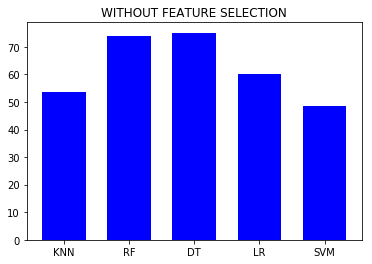

In [119]:
import plotly.plotly as py
import plotly.tools as tls

import matplotlib.pyplot as plt


x = ["KNN","RF","DT","LR","SVM"]
N = len(y)
y = [53.55,73.75,75.10,59.95,48.5]
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.title("WITHOUT FEATURE SELECTION")
plt.show()



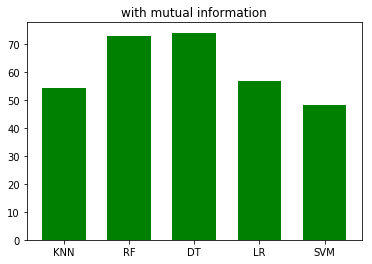

In [125]:
x = ["KNN","RF","DT","LR","SVM"]
N = len(y)
y = [54.20,72.96,74.11,56.80,48.28]
width = 1/1.5
plt.bar(x, y, width, color="green")
plt.title("with mutual information")
plt.show()

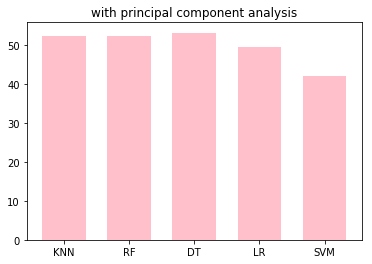

In [124]:
x = ["KNN","RF","DT","LR","SVM"]
N = len(y)
y = [52.36,52.37,53.17,49.49,42.11]
width = 1/1.5
plt.bar(x, y, width, color="pink")
plt.title("with principal component analysis")
plt.show()

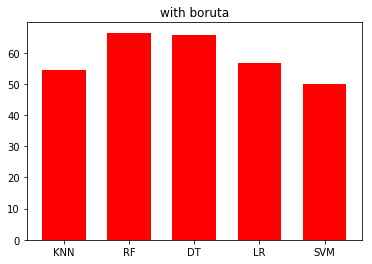

In [126]:
x = ["KNN","RF","DT","LR","SVM"]
N = len(y)
y = [54.55,66.42,65.74,56.76,50.13]
width = 1/1.5
plt.bar(x, y, width, color="red")
plt.title("with boruta")
plt.show()